<a href="https://colab.research.google.com/github/403ENDer/Resume-screening/blob/main/Resume_screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
import pandas as pd
import numpy as np
import nltk
import re
import PyPDF2
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.cluster.util import cosine_distance
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import fitz
from IPython.display import display, HTML
from PIL import Image

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
pdf_path = "/content/drive/MyDrive/Resumes/Harish_Kumar_N_2133017.pdf"

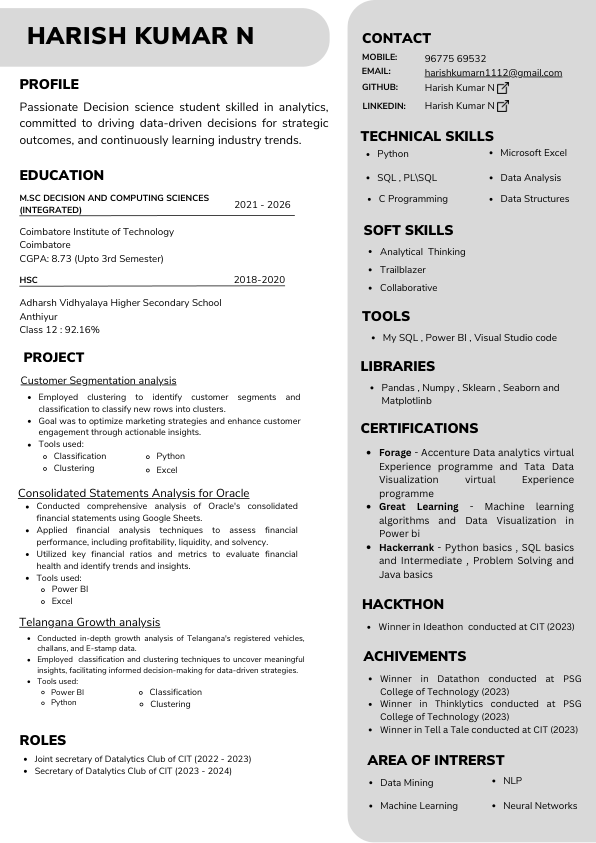

In [ ]:
def show_pdf(pdf_path):
    doc = fitz.open(pdf_path)

    for page_number in range(doc.page_count):
        page = doc[page_number]
        image_list = page.get_pixmap()
        pil_image = Image.frombytes("RGB", [image_list.width, image_list.height], image_list.samples)
        display(pil_image)

    doc.close()

show_pdf(pdf_path)

In [ ]:
text = ""
try:
    with open(pdf_path, "rb") as file:
        pdf_reader = PyPDF2.PdfReader(file)

        # Iterate through all pages
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()

except Exception as e:
    print(f"An error occurred: {str(e)}")

In [ ]:
text = text.lower()
text = re.sub(r'[^a-zA-Z\s]', '', text)
words = word_tokenize(text)
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]
# Remove punctuation
words = [word for word in words if word not in string.punctuation]

In [ ]:
words = list(set(words))

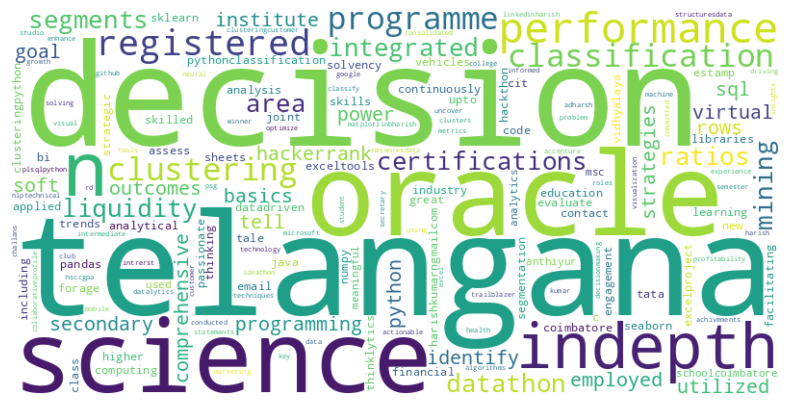

In [ ]:
extracted_words = " ".join(words)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(extracted_words)

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
requried_skills = ['python', 'sql', 'data_analysis', 'statistics', 'machine_learning', 'data_visualization', 'excel' , 'power bi' , 'pl_sql']
skill_weights = {
  'python': 5,
  'sql': 4,
  'data_analysis': 4,
  'statistics': 3,
  'machine_learning': 3,
  'data visualization': 3,
  'excel': 2,
  'power bi': 2,
  'pl_sql':2
}
score = sum(skill_weights.get(skill, 0) for skill in words if skill in requried_skills)
print(f'The score of the given resume is: {score}')

The score of the given resume is: 11
